In [60]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [61]:
df = pd.read_csv('data1.csv')
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


# Разминка 1

In [62]:
time = df.iloc[:, 1].values.tolist()
longitude = df.iloc[:, 2].values.tolist()
latitude = df.iloc[:, 3].values.tolist()

time = [x[12:] for x in time]

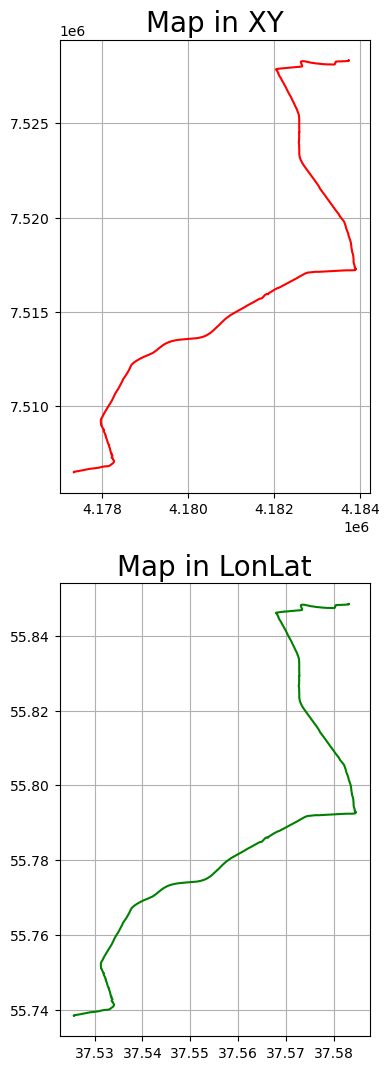

In [63]:
f=plt.figure()
f.set_figwidth(4)
f.set_figheight(20)

cy = []
cx = []
R = 6378137  # Radius of earth in M

for i in range(len(longitude)):
    cy.append(math.log(math.tan(math.pi / 4 + math.radians(latitude[i]) / 2)) * R)
    cx.append(math.radians(longitude[i]) * R)
        
plt.subplot(311)
plt.plot(cx,cy,'r')
plt.title('Map in XY', fontsize=20)
plt.grid()

plt.subplot(312)
plt.plot(longitude,latitude,'g')
plt.title('Map in LonLat', fontsize=20)
plt.grid()

In [66]:
import folium

mymap = folium.Map(location=[latitude[0], longitude[0]], zoom_start=15)

folium.PolyLine(list(zip(latitude[::10], longitude[::10])), color="red").add_to(mymap)

mymap

ModuleNotFoundError: No module named 'folium'

# Разминка 2

In [68]:
time_OBD = df.iloc[:, 1].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist()

In [69]:
time_GPS = [x[11:19] for x in time_GPS]
time_OBD = [x[12:] for x in time_OBD]

In [70]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]

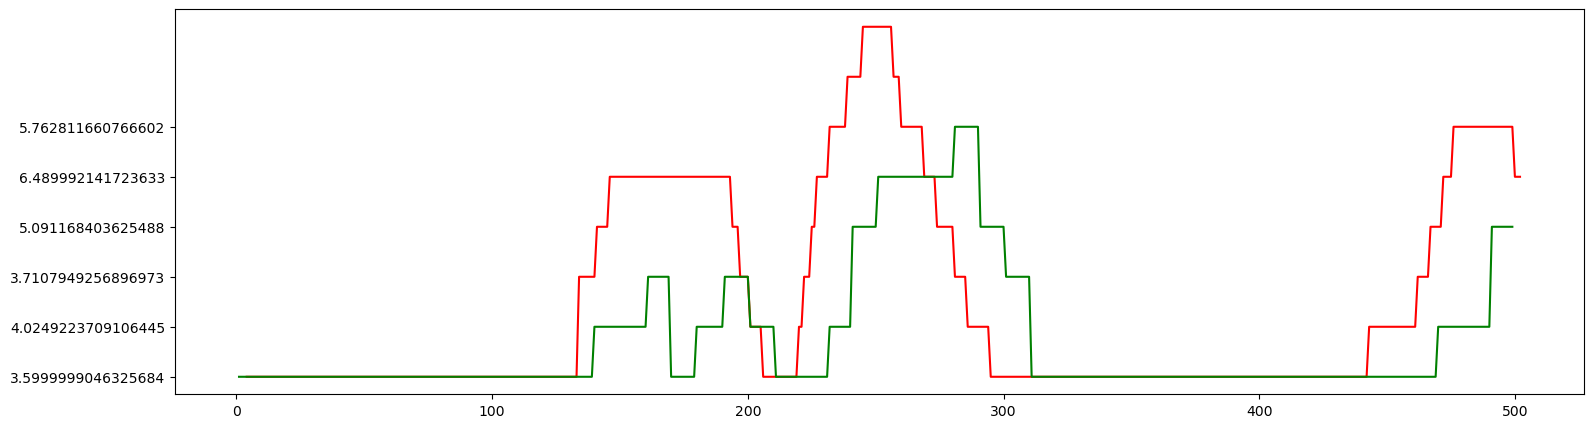

In [71]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))][4:503], speed_OBD[4:503],'r')
plt.plot([i for i in range(len(time_GPS))][1:500], speed_GPS[1:500],'g')

In [72]:
scaler = MinMaxScaler()

In [73]:
speed_OBD_1 = np.array([scaler.fit_transform(np.expand_dims(speed_OBD,axis = 1))])
speed_GPS_1 = np.array([scaler.fit_transform(np.expand_dims(speed_GPS,axis = 1))])

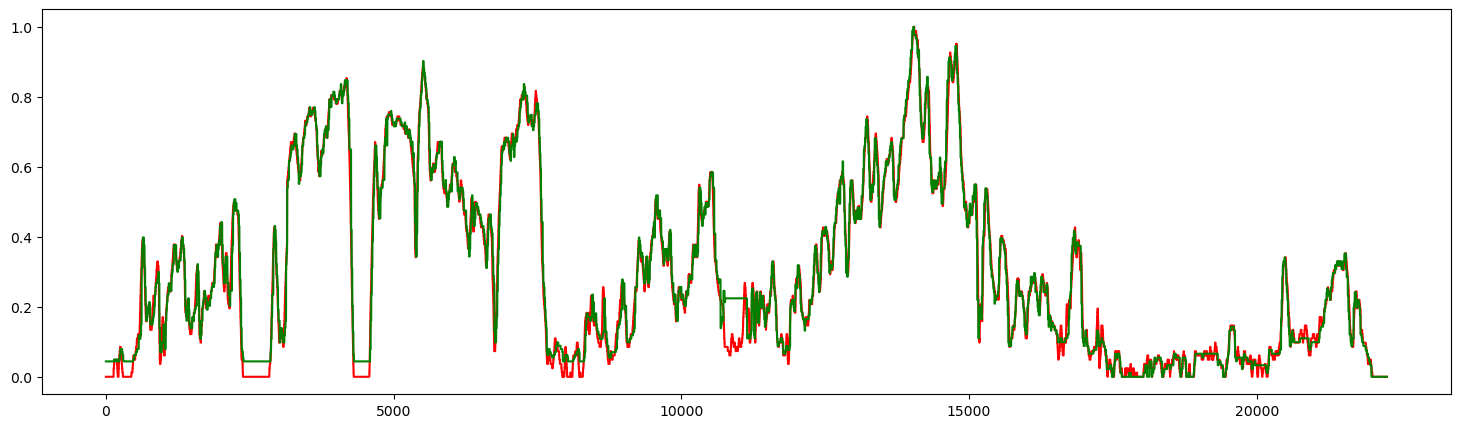

In [74]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(speed_GPS))], speed_OBD_1[0,:22261:,0],'r')
plt.plot([i for i in range(len(speed_GPS))], speed_GPS_1[0,::,0],'g')

# Разминка 3

In [77]:
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist()
bearing = df.iloc[:, 7].values.tolist()

In [78]:
time_GPS = [x[11:19] for x in time_GPS]

In [79]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]

Text(0.5, 1.0, 'Bearing(t)')

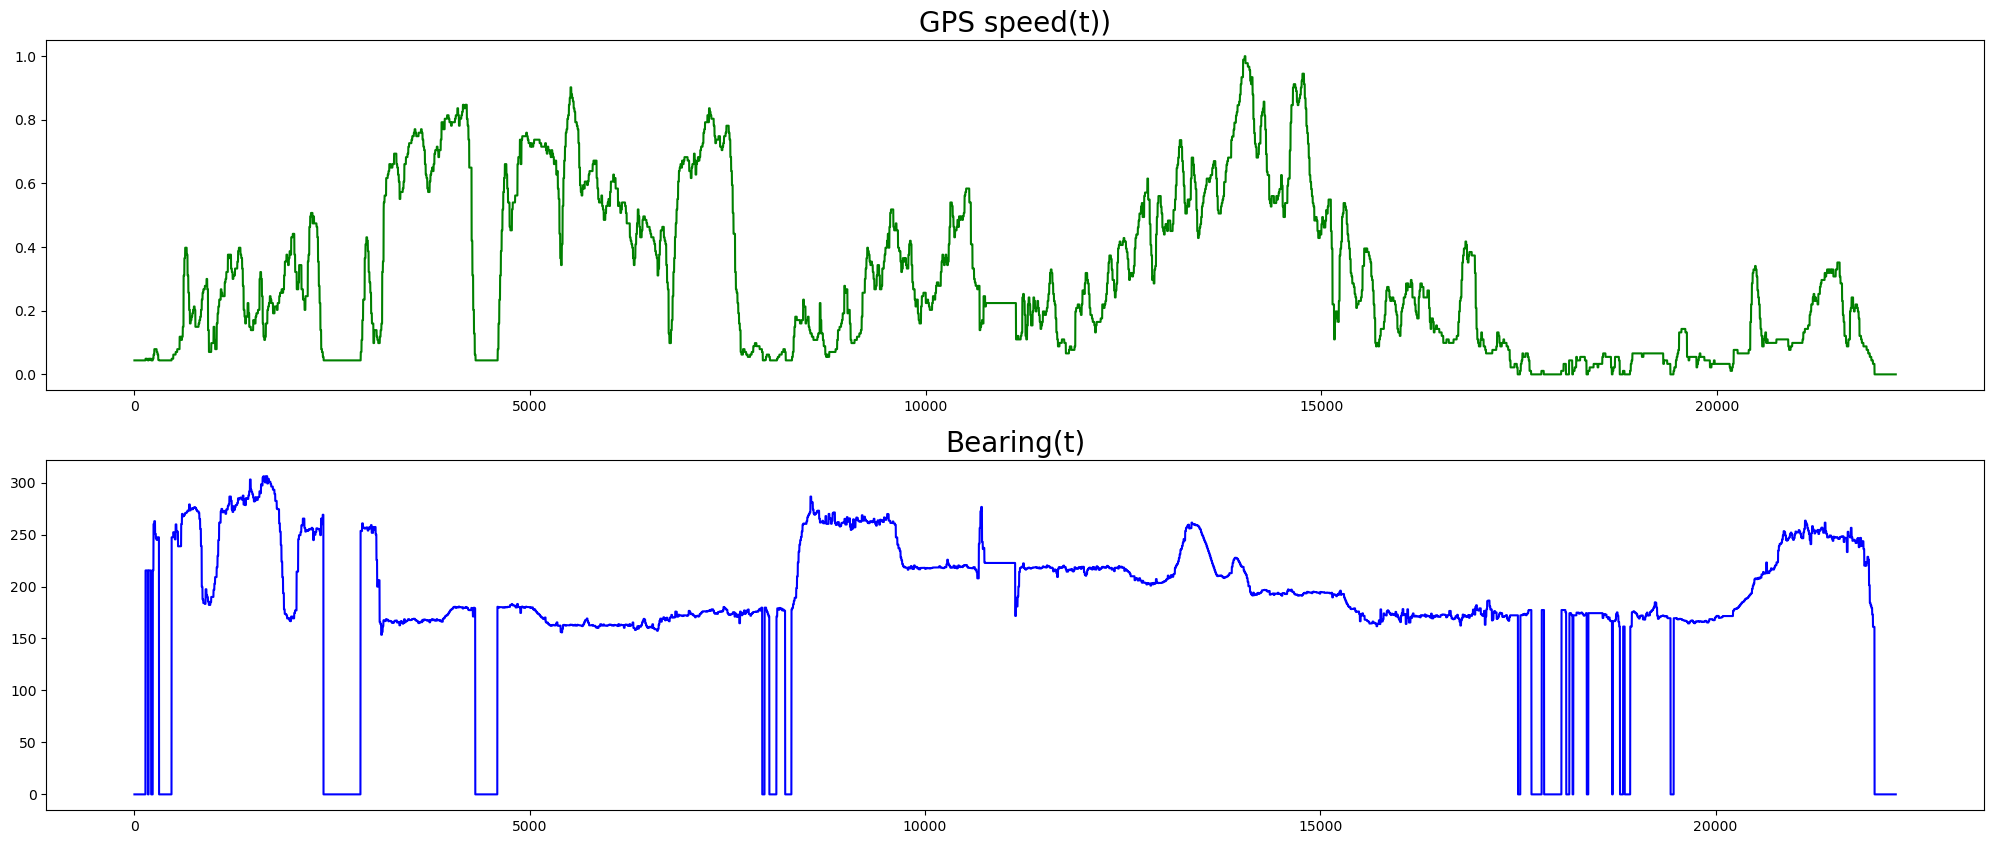

In [83]:
f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(speed_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('GPS speed(t))',fontsize=20)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS))],bearing,'b')
plt.title('Bearing(t)', fontsize=20)

In [86]:
velx = []
vely = []
for i in range(len(speed_GPS)):
    V = float(speed_GPS[i])
    Vx = V*math.cos(bearing[i])
    Vy = V*math.sin(bearing[i])
    velx.append(Vx)
    vely.append(Vy)


Text(0.5, 1.0, 'vely(t)')

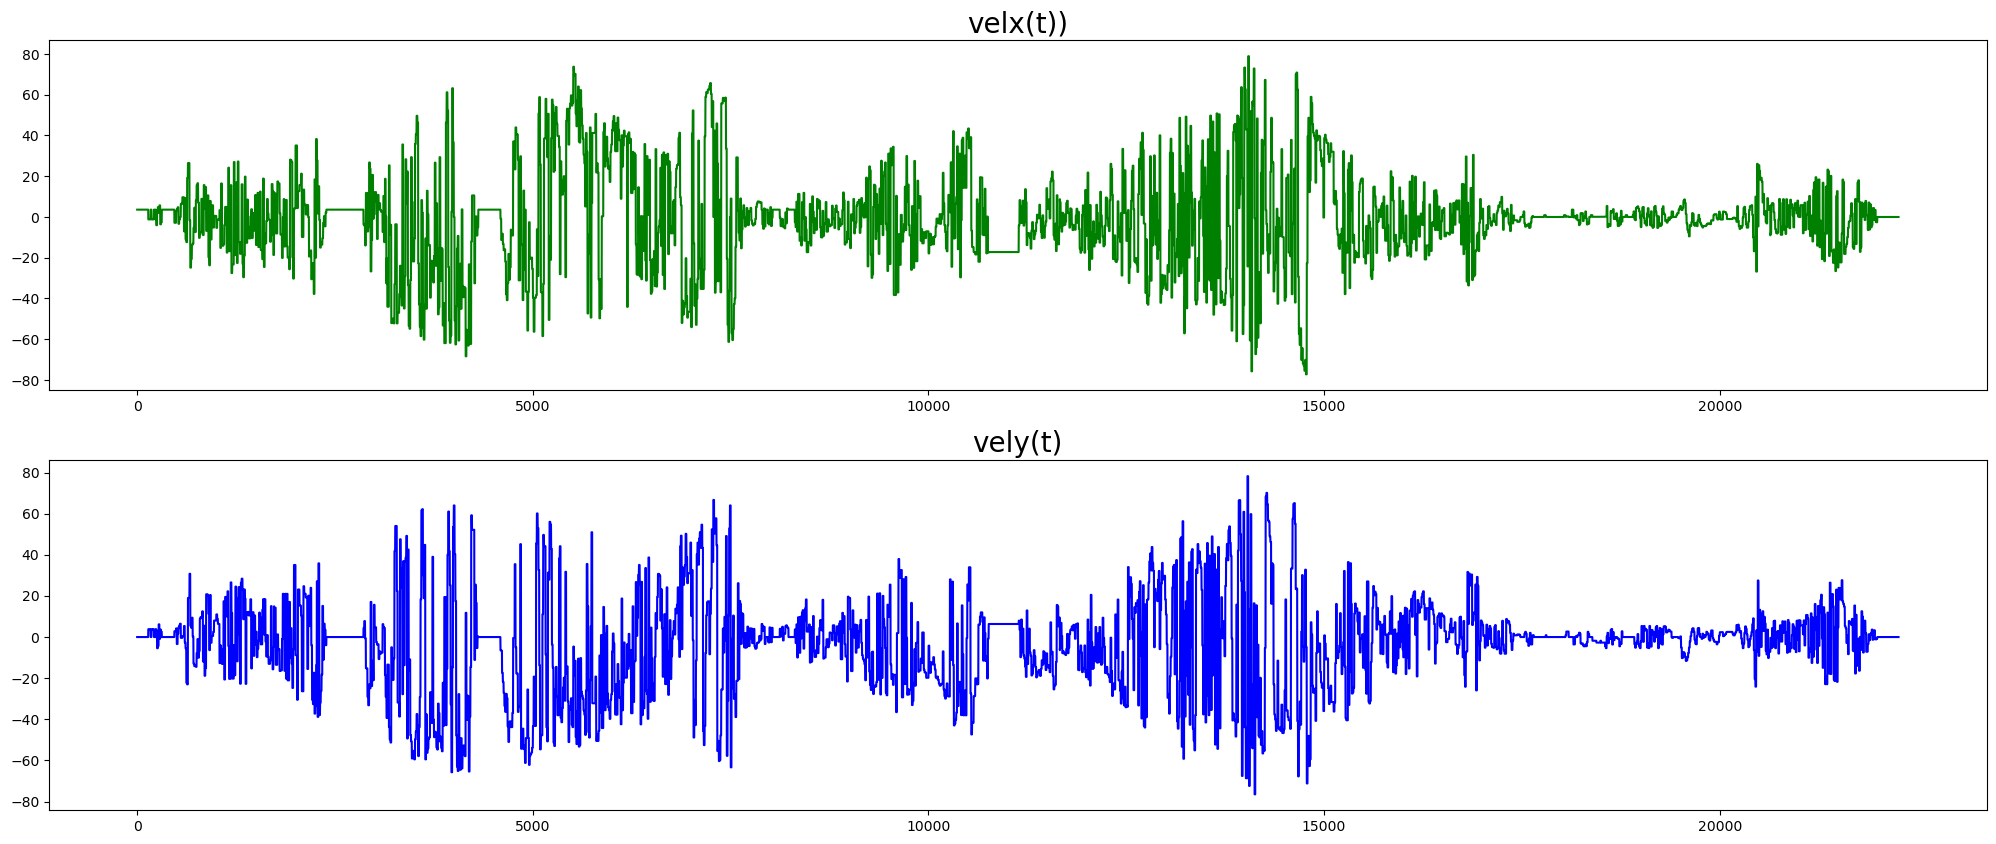

In [89]:
#глабольно вообще ничего не дает, 
#но вероятно если умножать скорость на время, то можно получить карту, если строить v(t) напрвленно

f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS[:22261]))], velx,'g')
plt.title('velx(t))',fontsize=20)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS[:22261]))],vely,'b')
plt.title('vely(t)', fontsize=20)